 **Name** : Karthik Renati

**Student Id**: 101159664

In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Simulation Parameters
TOTAL_POP = 2000
START_INFECTED = 5
DAYS_TO_RECOVER = 12
DEATH_CHANCE = 0.02

# Data Storage
infection_counts = [START_INFECTED]
recovery_counts = []
death_counts = []

total_infected = START_INFECTED
total_recovered = 0
total_deceased = 0
day_tracker = 1

In [3]:
# Simulate Disease Spread
while total_infected < TOTAL_POP:
    day_tracker += 1
    new_infections = min(random.randint(10, 100), TOTAL_POP - total_infected)
    infection_counts.append(new_infections)
    total_infected += new_infections

# Extend simulation for recovery tracking
simulation_duration = day_tracker + DAYS_TO_RECOVER
for _ in range(simulation_duration - len(infection_counts) + 1):
    infection_counts.append(0)

# Compute Recoveries and Deaths
for day in range(simulation_duration + 1):
    if day < DAYS_TO_RECOVER:
        recovery_counts.append(0)
        death_counts.append(0)
    else:
        previous_cases = infection_counts[day - DAYS_TO_RECOVER]
        fatalities = int(previous_cases * DEATH_CHANCE)
        recoveries = previous_cases - fatalities
        recovery_counts.append(recoveries)
        death_counts.append(fatalities)


In [4]:
# Generate Summary Table
daily_stats = []
cumulative_cases = 0
cumulative_recoveries = 0
cumulative_deaths = 0

for day in range(simulation_duration + 1):
    cumulative_cases += infection_counts[day]
    cumulative_recoveries += recovery_counts[day]
    cumulative_deaths += death_counts[day]

    death_rate = (cumulative_deaths / cumulative_cases) * 100 if cumulative_cases else 0
    recovery_rate = (cumulative_recoveries / cumulative_cases) * 100 if cumulative_cases else 0

    if day >= DAYS_TO_RECOVER:
        progressive_base = sum(infection_counts[:day - DAYS_TO_RECOVER + 1])
        progressive_death_rate = (cumulative_deaths / progressive_base) * 100 if progressive_base else 0
        progressive_recovery_rate = (cumulative_recoveries / progressive_base) * 100 if progressive_base else 0
    else:
        progressive_death_rate = 0
        progressive_recovery_rate = 0

    total_progress = progressive_death_rate + progressive_recovery_rate
    pending_recoveries = 100 - total_progress

    daily_stats.append({
        'Day': day + 1,
        'New Cases': infection_counts[day],
        'Recovered': recovery_counts[day],
        'Deceased': death_counts[day],
        'Total Cases': cumulative_cases,
        'Total Recovered': cumulative_recoveries,
        'Total Deaths': cumulative_deaths,
        'Death Rate': round(death_rate, 2),
        'Recovery Rate': round(recovery_rate, 2),
        'Progressive Death Rate': round(progressive_death_rate, 2),
        'Progressive Recovery Rate': round(progressive_recovery_rate, 2),
        'Total Progress': round(total_progress, 2),
        'Pending Recovery': round(pending_recoveries, 2)
    })

df = pd.DataFrame(daily_stats)
print(df.head(50))  # Displays the first 50 rows

    Day  New Cases  Recovered  Deceased  Total Cases  Total Recovered  \
0     1          5          0         0            5                0   
1     2         20          0         0           25                0   
2     3         19          0         0           44                0   
3     4         93          0         0          137                0   
4     5         93          0         0          230                0   
5     6         22          0         0          252                0   
6     7         98          0         0          350                0   
7     8         10          0         0          360                0   
8     9         83          0         0          443                0   
9    10         11          0         0          454                0   
10   11         28          0         0          482                0   
11   12         90          0         0          572                0   
12   13         33          5         0          60

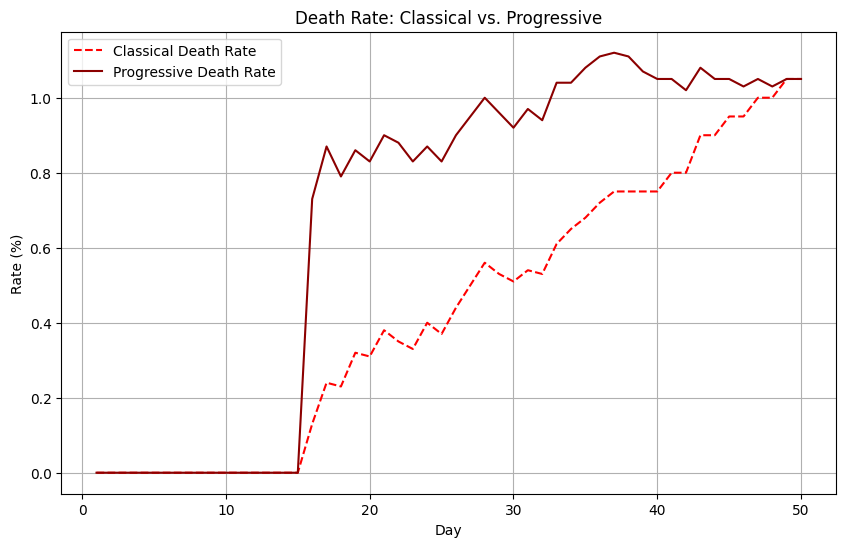

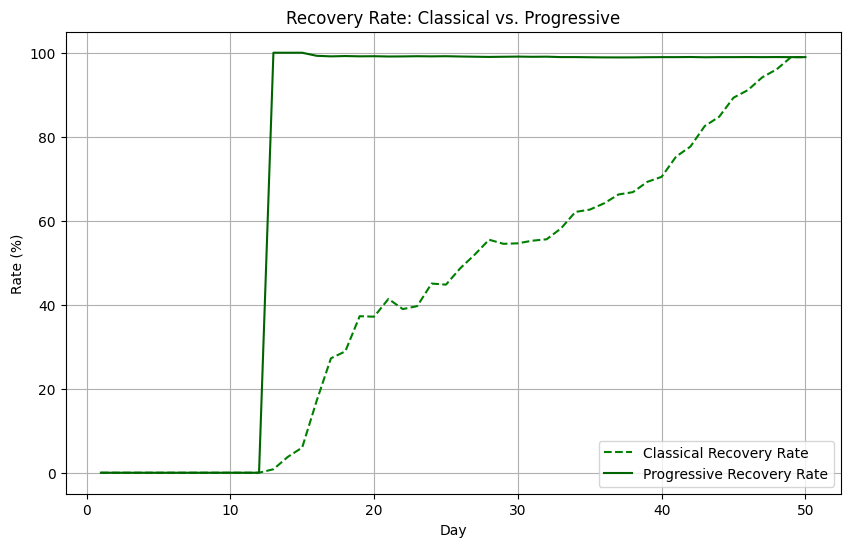

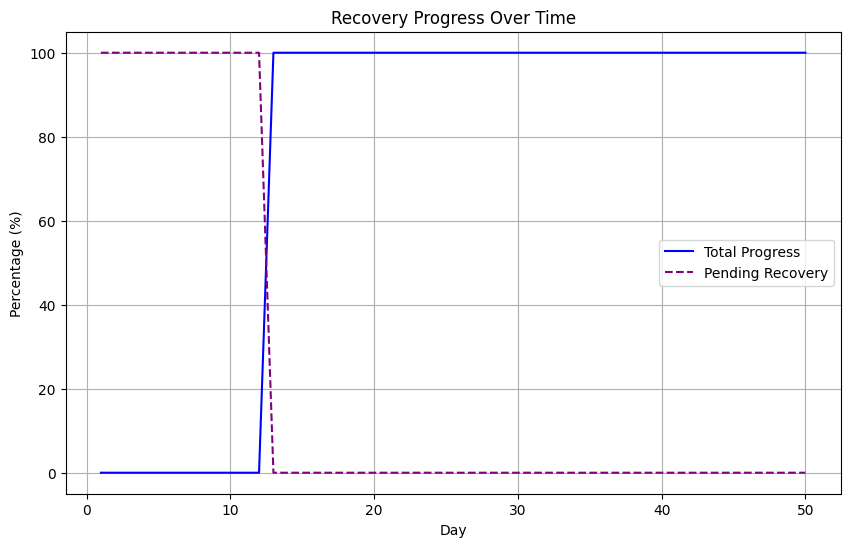

In [5]:
# Enhanced Visualizations
plt.figure(figsize=(10, 6))
plt.plot(df['Day'], df['Death Rate'], label='Classical Death Rate', linestyle='--', color='red')
plt.plot(df['Day'], df['Progressive Death Rate'], label='Progressive Death Rate', color='darkred')
plt.title('Death Rate: Classical vs. Progressive')
plt.xlabel('Day')
plt.ylabel('Rate (%)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(df['Day'], df['Recovery Rate'], label='Classical Recovery Rate', linestyle='--', color='green')
plt.plot(df['Day'], df['Progressive Recovery Rate'], label='Progressive Recovery Rate', color='darkgreen')
plt.title('Recovery Rate: Classical vs. Progressive')
plt.xlabel('Day')
plt.ylabel('Rate (%)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(df['Day'], df['Total Progress'], label='Total Progress', color='blue')
plt.plot(df['Day'], df['Pending Recovery'], label='Pending Recovery', linestyle='--', color='purple')
plt.title('Recovery Progress Over Time')
plt.xlabel('Day')
plt.ylabel('Percentage (%)')
plt.legend()
plt.grid(True)
plt.show()
